In [1]:
pip install --upgrade theano

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 3.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668094 sha256=1b5f0ec61cb171e0fc9ff149dee78daec7f69e4d30793add9d3b64cfa49b2883
  Stored in directory: /Users/diego/Library/Caches/pip/wheels/84/cb/19/235b5b10d89b4621f685112f8762681570a9fa14dc1ce904d9
Successfully built theano
You should consider upgrading via the '/Users/diego/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import keras 
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [52]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [53]:
X = dataset.iloc[:, 3:13].values
Y = dataset.iloc[:, 13].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [54]:
X.shape

(10000, 10)

# Encoding
# Tenemos dos variables string, por lo tanto debemos convertirlas en array numericos 

In [55]:
np.unique(X[:,1]), np.unique(X[:,2])

(array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [56]:
labelencoder_X_1 = LabelEncoder()
labelencoder_X_2 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])
X[:,2] = labelencoder_X_1.fit_transform(X[:,2])
np.unique(X[:,1]), np.unique(X[:,2]) 


(array([0, 1, 2], dtype=object), array([0, 1], dtype=object))

In [57]:
X.shape

(10000, 10)

In [58]:
onehotencoder = OneHotEncoder(categories='auto')
encoded = onehotencoder.fit_transform(X[:,1:3]).toarray()
X = np.concatenate((X,encoded), axis=1)

In [59]:
X_final = X[:,[0,3,4,5,6,7,8,9,10,11,12,13,14]]
X_final

array([[619, 42, 2, ..., 0.0, 1.0, 0.0],
       [608, 41, 1, ..., 1.0, 1.0, 0.0],
       [502, 42, 8, ..., 0.0, 1.0, 0.0],
       ...,
       [709, 36, 7, ..., 0.0, 1.0, 0.0],
       [772, 42, 3, ..., 0.0, 0.0, 1.0],
       [792, 28, 4, ..., 0.0, 1.0, 0.0]], dtype=object)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_final, Y, test_size = 0.2)
X_train.shape

(8000, 13)

# Feature Scaling

In [61]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train.std(), X_train.mean(),X_test.std(), X_test.mean()

(0.9999999999999991,
 1.0979251695831548e-15,
 0.9999999999999981,
 4.0336964537765685e-16)

# Initializing Neural Network

In [62]:
classifier = Sequential()

In [63]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform',activation = 'relu', input_shape = (None,8000,13)))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu' ))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))

In [64]:
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


In [65]:
classifier.fit(X_train, y_train,batch_size=10,epochs=50)

Epoch 1/50
800/800 [==============================] - 1s 998us/step - loss: 0.4926 - accuracy: 0.7991
Epoch 2/50
800/800 [==============================] - 1s 965us/step - loss: 0.4295 - accuracy: 0.7991
Epoch 3/50
800/800 [==============================] - 1s 989us/step - loss: 0.4262 - accuracy: 0.7991
Epoch 4/50
800/800 [==============================] - 1s 967us/step - loss: 0.4232 - accuracy: 0.7991
Epoch 5/50
800/800 [==============================] - 1s 1ms/step - loss: 0.4195 - accuracy: 0.8156
Epoch 6/50
800/800 [==============================] - 1s 917us/step - loss: 0.4167 - accuracy: 0.8246
Epoch 7/50
800/800 [==============================] - 1s 982us/step - loss: 0.4140 - accuracy: 0.8270
Epoch 8/50
800/800 [==============================] - 1s 905us/step - loss: 0.4124 - accuracy: 0.8270
Epoch 9/50
800/800 [==============================] - 1s 910us/step - loss: 0.4110 - accuracy: 0.8305
Epoch 10/50
800/800 [==============================] - 1s 891us/step - loss: 0.4093 

# Making predictions

In [66]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [67]:
contraste = (y_pred == y_test)
values, counter = np.unique(contraste, return_counts=True)
counter

array([1062920, 2937080])

In [68]:
counter[1]/(counter[1]+counter[0])*100

73.42699999999999

In [82]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[1530   40]
 [ 292  138]]


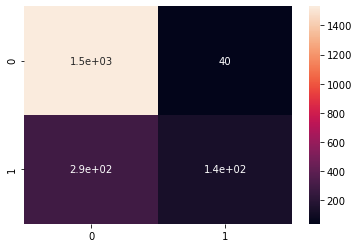

In [85]:
sns.heatmap(conf_matrix,annot = True);

In [101]:
accuracy  = (conf_matrix[1,1]+conf_matrix[0,0])/np.sum(conf_matrix)
f'The accuracy of the model is: {round(accuracy*100,2)}%'

'The accuracy of the model is: 83.4%'

'The accuracy of the model is: 83.39999999999999%'